# Pyber: Ride Sharing Analysis

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
CityData = os.path.join('05-Matplotlib', 'Instructions', 'Pyber', 'raw_data','city_data.csv')
RideData = os.path.join('05-Matplotlib', 'Instructions', 'Pyber', 'raw_data','ride_data.csv')
city_df = pd.read_csv(CityData)
ride_df = pd.read_csv(RideData)
pyber_df = pd.merge(city_df, ride_df, on='city', how='left')
pyber_df.shape

(2407, 6)

In [64]:
pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [79]:
mean_fare = pyber_df.groupby(['city'])['fare'].mean()
total_rides = pyber_df.groupby(['city'])['ride_id'].count()
total_drivers_df = city_df[['driver_count']]
total_drivers = city_df[['driver_count']].sum()
total_fares = pyber_df[('fare')].sum()
total_rides = pyber_df[('ride_id')].count()
rural_cites = pyber_df[(pyber_df.type == 'Rural')]
rural_cites_df = pd.DataFrame(pyber_df[(pyber_df.type == 'Rural')])
total_rural_fares = rural_cites_df[('fare')].sum()
perc_total_fares_rural = total_rural_fares / total_fares
suburban_cites_df = pd.DataFrame(pyber_df[(pyber_df.type == 'Suburban')])
urban_cites_df = pd.DataFrame(pyber_df[(pyber_df.type == 'Urban')])
total_suburban_fares = suburban_cites_df[('fare')].sum()
total_urban_fares = urban_cites_df[('fare')].sum()
total_rural_rides = rural_cites_df[('ride_id')].count()
total_suburban_rides = suburban_cites_df[('ride_id')].count()
total_urban_rides = urban_cites_df[('ride_id')].count()
perc_total_fares_urban = total_urban_fares / total_fares
perc_total_fares_suburban = total_suburban_fares / total_fares
perc_total_rides_rural = total_rural_rides / total_rides
perc_total_rides_urban = total_urban_rides / total_rides
perc_total_rides_suburban = total_suburban_rides / total_rides
rural_city_drivers_df = pd.DataFrame(city_df[(city_df.type == 'Rural')])
total_rural_drivers = rural_city_drivers_df[('driver_count')].sum()
perc_total_drivers_rural = total_rural_drivers / total_drivers
suburban_city_drivers_df = pd.DataFrame(city_df[(city_df.type == 'Suburban')])
total_suburban_drivers = suburban_city_drivers_df[('driver_count')].sum()
perc_total_drivers_suburban = total_suburban_drivers / total_drivers
urban_city_drivers_df = pd.DataFrame(city_df[(city_df.type == 'Urban')])
total_urban_drivers = urban_city_drivers_df[('driver_count')].sum()
perc_total_drivers_urban = total_urban_drivers / total_drivers

In [84]:
x = mean_fare
y = total_rides
z = total_drivers_df
 
plt.scatter(x, y, s=z*3, alpha=0.5)
plt.title('Pyber Data')
plt.xlabel('Total Rides by City')
plt.ylabel('Mean Fare by City')
plt.show()

ValueError: x and y must be the same size

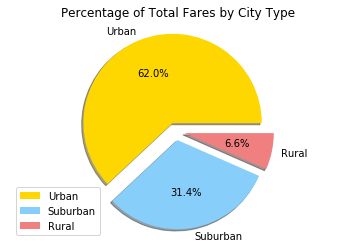

In [81]:
labels = ['Urban', 'Suburban', 'Rural']
sizes = [perc_total_fares_urban, perc_total_fares_suburban, perc_total_fares_rural]
colors = ['gold','lightskyblue','lightcoral']

explode = [0.1,0.1,0.1]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%",shadow=True, startangle=0)
plt.legend(labels, loc="lower left")
plt.title('Percentage of Total Fares by City Type')
plt.axis("equal")
plt.show()

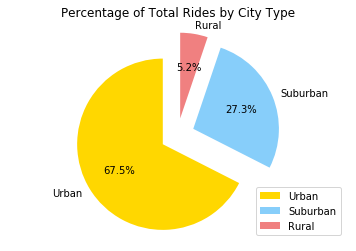

In [82]:
labels = ['Urban', 'Suburban', 'Rural']
sizes = [perc_total_rides_urban, perc_total_rides_suburban, perc_total_rides_rural]
colors = ['gold','lightskyblue','lightcoral']

explode = [0.2,0.2,0.2]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%",shadow=False, startangle=90)
plt.title('Percentage of Total Rides by City Type')
plt.legend(labels, loc="best")
plt.axis("equal")
plt.show()

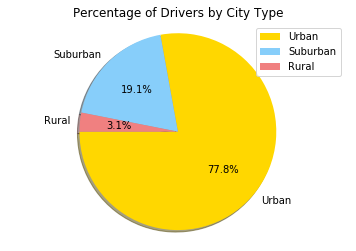

In [83]:
labels = ['Urban', 'Suburban', 'Rural']
sizes = [perc_total_drivers_urban, perc_total_drivers_suburban, perc_total_drivers_rural]
colors = ['gold','lightskyblue','lightcoral']

explode = [0,0,0]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%",shadow=True, startangle=180)
plt.title('Percentage of Drivers by City Type')
plt.legend(labels, loc="upper right")
plt.axis("equal")
plt.show()